In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import math
import time

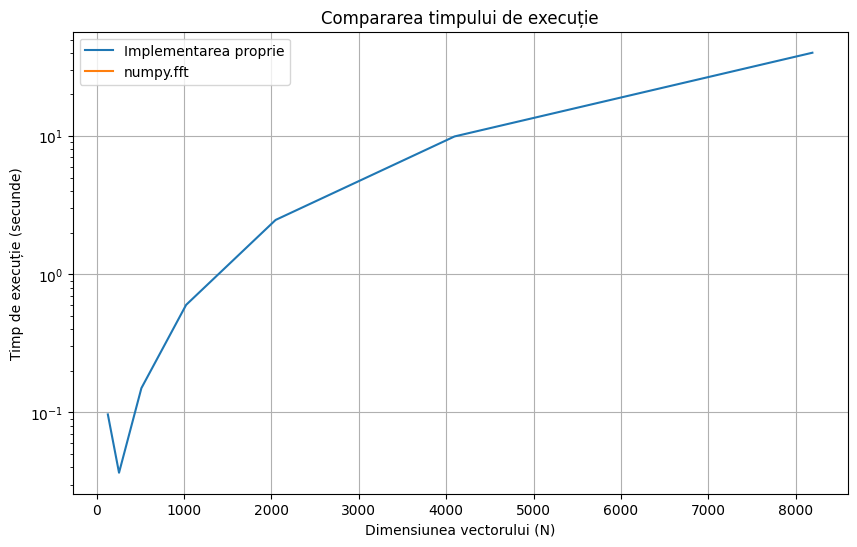

In [19]:
# 1. La laboratorul precedent ati implementat voi Transformata Fourier Discreta. Comparati timpul de executie al implementarii voastre cu numpy.fft.
# Desenati un grafic cu timpii de executie pentru dimensiunile vectorilor
# N ∈ {128, 256, 512, 1024, 2048, 4096, 8192}. Folositi time.time pentru a
# calcula timpul de rulare iar la plot pentru axa Oy afisati ambii timpi pe
# scara logaritmica.
def matrice_Fourier(N):
    F = np.zeros((N, N), dtype=np.complex128)
    for n in range(N):
        for w in range(N):
            F[n, w] = math.e**(-2j * np.pi * n * w / N)
    return (1/np.sqrt(N))*F


f = 3
N = [128, 256, 512, 1024, 2048, 4096, 8192]
time_def = []
time_fft = []
for n in N:
    t = np.linspace(0,1,n)
    signal = np.sin(2*np.pi*f*t)
    start = time.time()
    F = matrice_Fourier(n)
    X = np.dot(F,signal)
    end = time.time()-start
    time_def.append(end)

    start = time.monotonic()
    X = fft.fft(signal)
    end = time.monotonic() - start
    time_fft.append(end)

plt.figure(figsize=(10, 6))
plt.yscale("log")
plt.plot(N, time_def, label="Implementarea proprie")
plt.plot(N, time_fft, label="numpy.fft")
plt.xlabel("Dimensiunea vectorului (N)")
plt.ylabel("Timp de execuție (secunde)")
plt.title("Compararea timpului de execuție")
plt.legend()
plt.grid()
plt.show()  


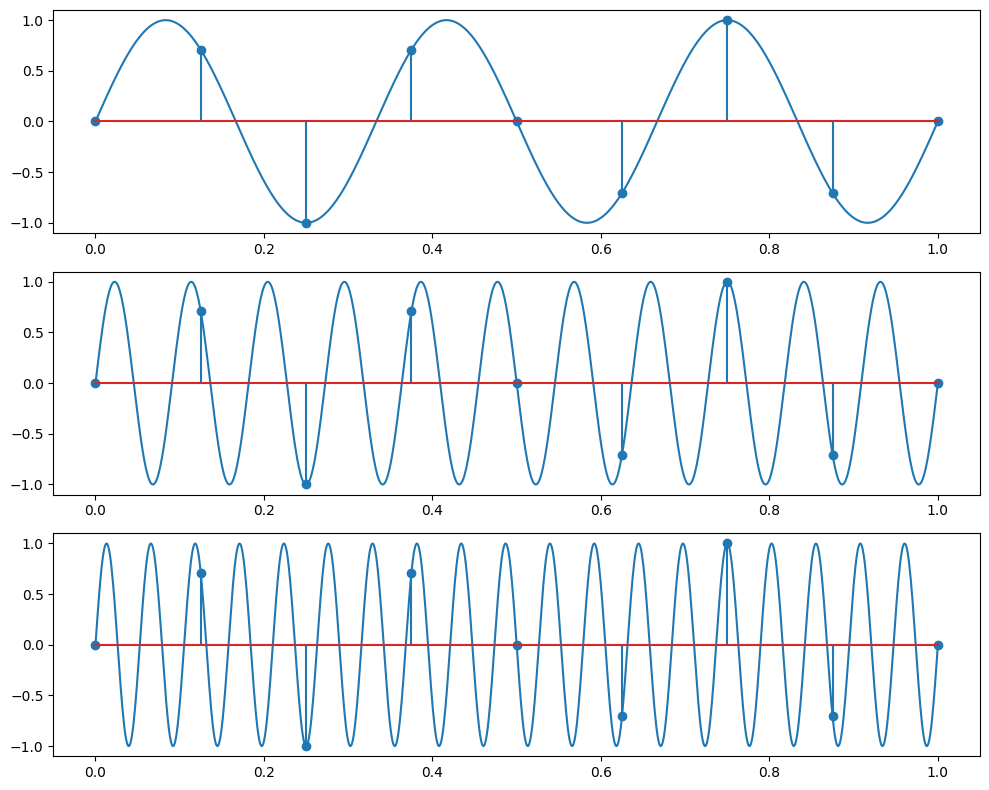

In [18]:
# 2. Construiti un semnal sinusoidal de frecventa aleasa de voide amplitudine unitara si faza nula. Demonstrati (grafic) ca esantionarea lui cu o
# frecventa sub-Nyquist (aleasa de asemeneade voi) genereaza fenomenul
# de aliere. Pentru aceasta creati alte doua semnalede frecvente diferite
# care esantionate cu frecventa aleasa mai sus produc aceleasi esantioane ca
# semnalul initial. Obtineti astfel o figura similara Figurii 2.


t = np.linspace(0,1,1000)
f = 3
fs = 8
p = np.linspace(0,1,fs+1)
signal = np.sin(2*np.pi*f*t)
signal1  = np.sin(2*np.pi*(f+fs)*t)
signal2  = np.sin(2*np.pi*(f+2*fs)*t)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(t, signal)
axes[1].plot(t, signal1)
axes[2].plot(t, signal2)

signal = np.sin(2*np.pi*f*p)
signal1  = np.sin(2*np.pi*(f+fs)*p)
signal2  = np.sin(2*np.pi*(f+2*fs)*p)

axes[0].stem(p,signal)
axes[1].stem(p,signal)
axes[2].stem(p,signal)

plt.tight_layout()
plt.show()



In [ ]:
# 3. Demonstrati (grafic) ca alegand o frecventa de esantionare mai mare decat
# frecventa Nyquist nu mai obtineti fenomenul de aliere pentru semnalul
# ales la exercitiul precedent. La fel ca mai susindicati esantioanele si
# pentru celelalte doua semnale construite.

In [ ]:
# 4. Frecventele emise de un contrabas se incadreaza intre 40Hz si 200Hz. Care
# este frecventa minima cu care trebuie esantionat semnalul trece-banda
# provenit din inregistrarea instrumentuluiastfel incat semnalul discretizat
# sa contina toate componentele de frecventa pe care instrumentul le poate
# produce?